In [1]:
# %matplotlib inline
from utils import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# get color attributes
color, carray, cmap = cattr(N=200)

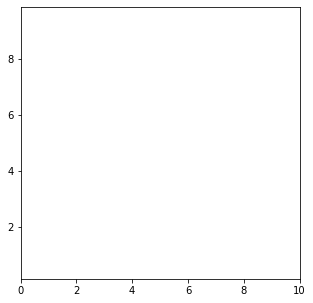

In [4]:
# Set up the figure, axis, and the static plot element
fig, ax = plt.subplots(figsize=(5, 5))
# fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

p0, = ax.plot([], [],'o', c=carray[0], ms=3)
p1, = ax.plot([], [],'o', c=carray[1], ms=3)
line, = ax.plot([], [], lw=1, alpha=0.3, c='gray')
pj1, = ax.plot([], [], 'o', alpha=0.3, c=carray[0], ms=3)
pj2, = ax.plot([], [], 'o', alpha=0.3, c=carray[1], ms=3)
angle_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
N_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

In [5]:
frame = 10

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    p0.set_data([], [])
    p1.set_data([], [])
    pj1.set_data([], [])
    pj2.set_data([], [])
    N_text.set_text('')
    angle_text.set_text('')
    return line, 

# animation function, which is called sequentially and generate frames
def animate(i):
    i = 2 ** (i + 1)
    data_uni = gen_norm(N=i, c1=[[0.7, 0], [0, 0.4]],c2=[[0.42, 0], [0, 0.57]])
    color, _, _ = cattr(N=i)
    pxs, W, m0, m1 = lda(data_uni, color)
    k = W[1]/W[0]
    x = np.linspace(0, 10, 10)
    y = k * (x-5)+5

    line.set_data(x, y)
    p0.set_data(data_uni[0:i, 0], data_uni[0:i, 1])
    p1.set_data(data_uni[i:i * 2, 0], data_uni[i:i*2, 1])
    pj1.set_data(pxs[0:i, 0], pxs[0:i, 1])
    pj2.set_data(pxs[i:i*2, 0], pxs[i:i*2, 1])
    angle_text.set_text('slope angle = %.1f$^o$' % (np.arctan(k)))
    N_text.set_text('$Var_{within}$ = %d' % i)
    return line, 

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame, interval=200, blit=True)
html = anim.to_jshtml()
HTML(html)

In [7]:
with open('size.html','w') as f:
    f.write(html)

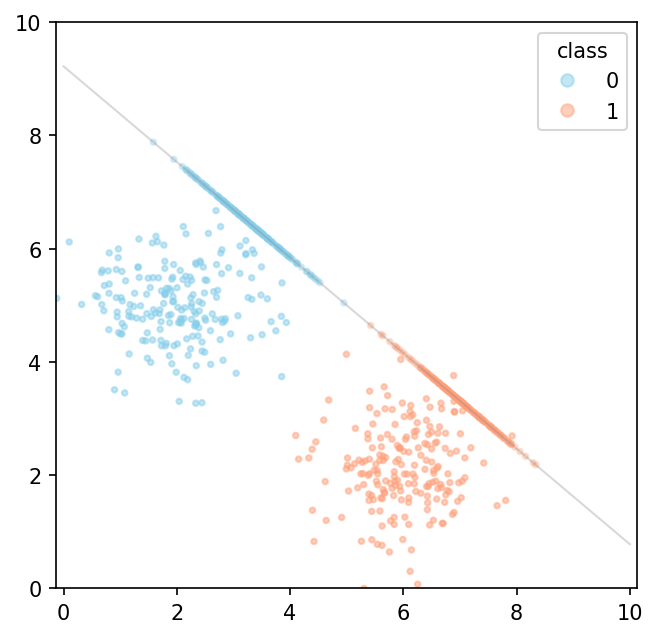

In [8]:
# generate static
# uniform binormal
# get skewed Gaussian distributed data
data_uni = gen_norm(N=200, c1=[[0.7, 0], [0, 0.4]],c2=[[0.42, 0], [0, 0.57]])

pxs, W, m0, m1 = lda(data_uni, color)

k = W[1]/W[0]
x = np.linspace(0, 10, 10)
y = k * (x-5)+5
ax.plot(x, y, lw=1, alpha=0.3, c='gray')
pxs = np.array(pxs)
scat = ax.scatter(data_uni[:,0], data_uni[:,1], c=color, alpha=0.5, cmap=cmap, s=7)
ax.legend(*scat.legend_elements(num=1),
                    loc="upper right", title="class")
ax.scatter(pxs[:, 0], pxs[:, 1], c=color, cmap=cmap, alpha=0.3, s=7)
# ax.plot(2, 5, marker='*', c='royalblue')
# ax.scatter(6, 2, marker='*', c='orangered')
plt.savefig('skew3_N200.svg')